# Salary Prediction

Corresponding  with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Regression](#regression)
- [Part III - Interpret Results](#interpret)


<a id='intro'></a>
### Introduction

Linear Regression is very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of a Linear Regression model associated with salaries.  Your goal is to work through this notebook to understand what variables are related to salary, and how exactly they are related.

As a final check, assure you meet all the criteria on the rubric.

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(0)

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `salary_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [2]:
df = pd.read_csv('salary_data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful pandas link - `Dataframe.shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [3]:
df.shape

(375, 6)

`c)` Do any of the rows have missing values? [Helpful pandas link - `Dataframe.isnull`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [helpful pandas link - `Dataframe.sum`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

If there are missing values, determine a method for dealing with them.

In [4]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [5]:
df[df['Age'].isnull() == True]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(inplace=True)
df.shape

(373, 6)

Text(0.5, 1.0, 'Histogram of Age in years with Amount of people')

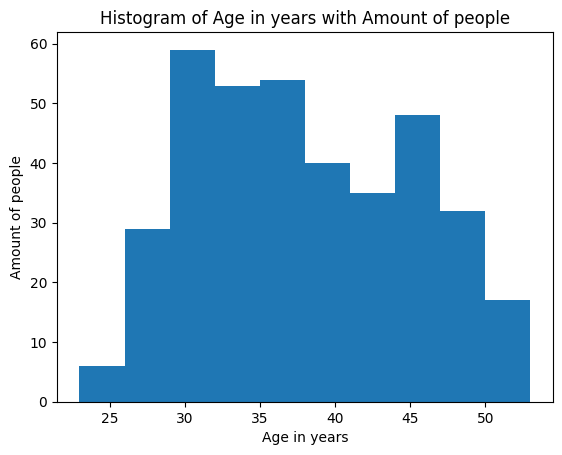

In [7]:
df['Age'].plot(kind="hist")
plt.xlabel("Age in years")
plt.ylabel("Amount of people")
plt.title("Histogram of Age in years with Amount of people")

In [8]:
df['Age'].max() , df['Age'].min()

(53.0, 23.0)

In [15]:
df['Age'].value_counts()

33.0    24
29.0    23
35.0    22
31.0    21
44.0    21
36.0    20
34.0    17
45.0    17
38.0    15
30.0    15
47.0    15
40.0    13
28.0    13
43.0    12
37.0    12
41.0    12
32.0    12
39.0    12
42.0    11
46.0    10
27.0     9
48.0     9
50.0     8
49.0     8
26.0     7
51.0     5
25.0     4
52.0     3
24.0     1
23.0     1
53.0     1
Name: Age, dtype: int64

`d)` How many employees are in each `Education Level`? Build a bar chart to show the count of employees in each level.

[Text(0, 0, '224'), Text(0, 0, '98'), Text(0, 0, '51')]

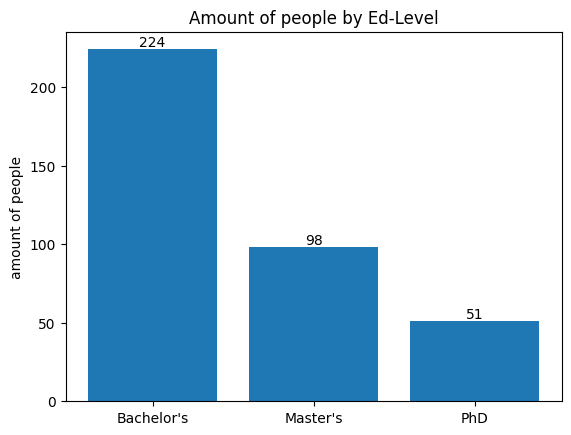

In [16]:
ed_categories = [ cat for cat in pd.unique(df['Education Level']).astype(str) if cat != 'nan']
ed_categories

ed_count = df['Education Level'].value_counts()
ed_count


#plt.bar(categories,df['Education Level'].value_counts(),label=df['Education Level'].value_counts())

fig, ax = plt.subplots()
bar_container = ax.bar(ed_categories, ed_count)
ax.set(ylabel='amount of people', title='Amount of people by Ed-Level')#, ylim=(0, 8000))
ax.bar_label(bar_container)#, fmt='{:,.0f}')

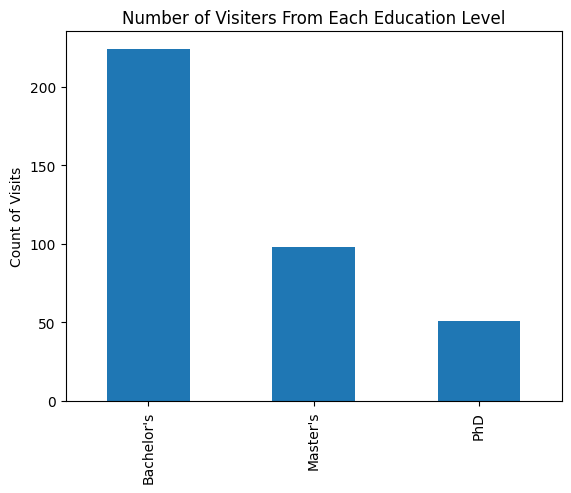

In [17]:
# bar chart of results - this part is done for you
df['Education Level'].value_counts().plot(kind='bar');
plt.title('Number of Visiters From Each Education Level');
plt.ylabel('Count of Visits');
plt.show();

`e)` What are the possible values for `Salary`?  What does the distribution of `Salary` look like?

--> The possible values for `Salary` is in a range between 350 and 250000. The distribution of `Salary` is `right-skewed`.

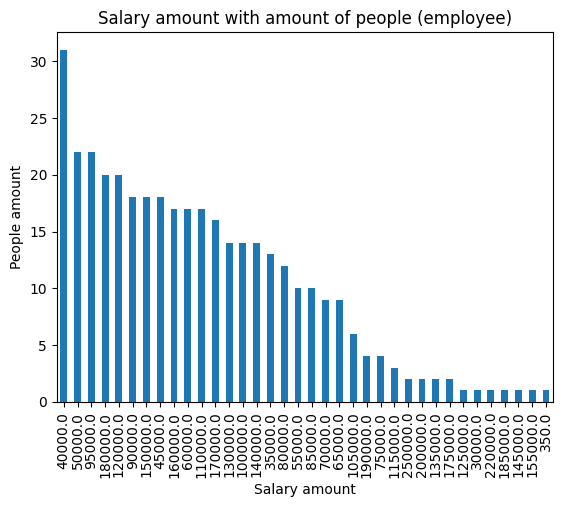

In [18]:
df['Salary'].value_counts().plot(kind="bar")
plt.xlabel("Salary amount")
plt.ylabel("People amount")
plt.title("Salary amount with amount of people (employee)")
plt.show()

In [19]:
df["Salary"].value_counts()

40000.0     31
50000.0     22
95000.0     22
180000.0    20
120000.0    20
90000.0     18
150000.0    18
45000.0     18
160000.0    17
60000.0     17
110000.0    17
170000.0    16
130000.0    14
100000.0    14
140000.0    14
35000.0     13
80000.0     12
55000.0     10
85000.0     10
70000.0      9
65000.0      9
105000.0     6
190000.0     4
75000.0      4
115000.0     3
250000.0     2
200000.0     2
135000.0     2
175000.0     2
125000.0     1
30000.0      1
220000.0     1
185000.0     1
145000.0     1
155000.0     1
350.0        1
Name: Salary, dtype: int64

<a id='regression'></a>
#### Part II - Regression

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `Salary`.

`a)` Consider average salary by gender, is there evidence that salaries are higher for one gender over the other? **This question is completed for you**

--> Absolutely, The evidence from the query shown that the average salary of Male is more than of Female.

In [12]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [13]:
df.groupby(df["Gender"])['Salary'].mean()

Gender
Female     97011.173184
Male      103867.783505
Name: Salary, dtype: float64

`b)` Consider average salary by education level, is there evidence that salaries are higher for increased education?

--> `Definitely, Yes`

In [14]:
df.groupby(df["Education Level"])['Salary'].mean()

Education Level
Bachelor's     74756.026786
Master's      129795.918367
PhD           157843.137255
Name: Salary, dtype: float64

`c)` Consider average salary by years of experience, is there evidence that salaries are associated with increased years of experience?

--> Most of the evidence shown that salaries are associated with increased years of experience until it reachs experience years of 24 to 25 which is in decreased inclination.

In [15]:
df.groupby(df["Years of Experience"])['Salary'].mean()

Years of Experience
0.0      33333.333333
0.5      35000.000000
1.0      37857.142857
1.5      36279.166667
2.0      41774.193548
3.0      51166.666667
4.0      58500.000000
5.0      64117.647059
6.0      83750.000000
7.0      84444.444444
8.0      88800.000000
9.0     101818.181818
10.0    100555.555556
11.0    100500.000000
12.0    105000.000000
13.0    120000.000000
14.0    125769.230769
15.0    134375.000000
16.0    157500.000000
17.0    143000.000000
18.0    149615.384615
19.0    166333.333333
20.0    168846.153846
21.0    173846.153846
22.0    162222.222222
23.0    177500.000000
24.0    250000.000000
25.0    200000.000000
Name: Salary, dtype: float64

`d)`  To make use of Job Title column, let's create a bool flag based on word existence

List of words: 

* Director
* Junior
* Senior
* Manager
* Analyst
* Engineer

**This question is completed for you**

In [16]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [17]:
flag_words = ['director', 'junior', 'senior', 'manager', 'analyst', 'engineer']
df['Job Title'] = df['Job Title'].str.lower()

for word in flag_words:
    df['is_' + word] = df['Job Title'].str.contains(word)
    
df = df.drop('Job Title', axis=1)

In [18]:
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,is_director,is_junior,is_senior,is_manager,is_analyst,is_engineer
0,32.0,Male,Bachelor's,5.0,90000.0,False,False,False,False,False,True
1,28.0,Female,Master's,3.0,65000.0,False,False,False,False,True,False
2,45.0,Male,PhD,15.0,150000.0,False,False,True,True,False,False
3,36.0,Female,Bachelor's,7.0,60000.0,False,False,False,False,False,False
4,52.0,Male,Master's,20.0,200000.0,True,False,False,False,False,False


In [19]:
role = [role for role in df.columns if role.startswith("is_")]
role

for roles in role :
    df[roles] = df[roles].replace({True : 1 , False : 0})
    
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,is_director,is_junior,is_senior,is_manager,is_analyst,is_engineer
0,32.0,Male,Bachelor's,5.0,90000.0,0,0,0,0,0,1
1,28.0,Female,Master's,3.0,65000.0,0,0,0,0,1,0
2,45.0,Male,PhD,15.0,150000.0,0,0,1,1,0,0
3,36.0,Female,Bachelor's,7.0,60000.0,0,0,0,0,0,0
4,52.0,Male,Master's,20.0,200000.0,1,0,0,0,0,0


`e)` Create a flag for gender where 1 is if a person is male and 0 if the person is not.

In [20]:
df[['Female','Male']] = pd.get_dummies(df["Gender"])
df = df.drop('Gender',axis=1)
df.head()

,Age,Education Level,Years of Experience,Salary,is_director,is_junior,is_senior,is_manager,is_analyst,is_engineer,Female,Male
0,32.0,Bachelor's,5.0,90000.0,0,0,0,0,0,1,0,1
1,28.0,Master's,3.0,65000.0,0,0,0,0,1,0,1,0
2,45.0,PhD,15.0,150000.0,0,0,1,1,0,0,0,1
3,36.0,Bachelor's,7.0,60000.0,0,0,0,0,0,0,1,0
4,52.0,Master's,20.0,200000.0,1,0,0,0,0,0,0,1


my `f)` Create dummy variables for Education Level since it's categorical variable 

In [21]:
df[["Bachelor's","Master's","PhD"]] = pd.get_dummies(df['Education Level'])
df = df.drop("Education Level",axis=1)
df.head()

,Age,Years of Experience,Salary,is_director,is_junior,is_senior,is_manager,is_analyst,is_engineer,Female,Male,Bachelor's,Master's,PhD
0,32.0,5.0,90000.0,0,0,0,0,0,1,0,1,1,0,0
1,28.0,3.0,65000.0,0,0,0,0,1,0,1,0,0,1,0
2,45.0,15.0,150000.0,0,0,1,1,0,0,0,1,0,0,1
3,36.0,7.0,60000.0,0,0,0,0,0,0,1,0,1,0,0
4,52.0,20.0,200000.0,1,0,0,0,0,0,0,1,0,1,0


`f)` Use statsmodels to fit a linear model to predict salary using each of the features from `a-e`.  These include:
* Gender
* Job TItle
* Years of Experience
* Education

In [22]:
df['intercept'] = 1
X = df.drop("Salary",axis=1)
y = df['Salary']

X.head() , y.head()

(    Age  Years of Experience  is_director  is_junior  is_senior  is_manager  \
 0  32.0                  5.0            0          0          0           0   
 1  28.0                  3.0            0          0          0           0   
 2  45.0                 15.0            0          0          1           1   
 3  36.0                  7.0            0          0          0           0   
 4  52.0                 20.0            1          0          0           0   
 
    is_analyst  is_engineer  Female  Male  Bachelor's  Master's  PhD  intercept  
 0           0            1       0     1           1         0    0          1  
 1           1            0       1     0           0         1    0          1  
 2           0            0       0     1           0         0    1          1  
 3           0            0       1     0           1         0    0          1  
 4           0            0       0     1           0         1    0          1  ,
 0     90000.0
 1     650

In [23]:
import statsmodels.api as sms

In [24]:
model = sms.OLS(y, X)
results = model.fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     382.7
Date:                Sat, 16 Aug 2025   Prob (F-statistic):          2.05e-191
Time:                        08:54:10   Log-Likelihood:                -4077.7
No. Observations:                 373   AIC:                             8179.
Df Residuals:                     361   BIC:                             8227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                  2624.6859    517.847      5.068      0.000    1606.310    3643.062
Years of Experience  2083.7700    594.583      3.505      0.001     914.489    3253.051
is_director          2.495e+04   3421.566      7.291      0.000    1.82e+04    3.17e+04
is_junior           -6064.7855   2398.876     -2.528      0.012   -1.08e+04   -1347.259
is_senior            1.125e+04   1945.966      5.781      0.000    7422.732    1.51e+04
is_manager           4722.5675   1897.589      2.489      0.013     990.850    8454.285
is_analyst           -674.2852   2037.975     -0.331      0.741   -4682.080    3333.510
is_engineer          1044.0553   3456.195      0.302      0.763   -5752.749    7840.859
Female              -9667.0949   3888.100     -2.486      0.013   -1.73e+04   -2020.924
Male                -1163.9769   3708.120     -0.314      0.754   -8456.207    6128.254
Bachelor's          -1.682e+04   2870.474     -5.861      0.000   -2.25e+04   -1.12e+04
Master's            -2260.8228   2742.452     -0.824      0.410   -7654.011    3132.366
PhD                  8254.3988   2999.373      2.752      0.006    2355.960    1.42e+04
intercept           -1.083e+04   7453.881     -1.453      0.147   -2.55e+04    3827.410
==============================================================================
Omnibus:                      166.054   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1834.632
Skew:                           1.563   Prob(JB):                         0.00
Kurtosis:                      13.405   Cond. No.                     3.51e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.76e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<a id='interpretation'></a>
### Part III - Interpret Results

`1.` Consider you are tasked with finding which features in your linear model are significantly related to salary.  Were there any features that were not significantly related to salary in your first model?  If not, remove those features and fit a new model.  Only keep the features that were significant from the original model.

`Answer` The condition of statistical significance is if the p-value, "P>|t|", is less than 0.05 otherwise it's not.
There are 5 columns which aren't have statistical significant due to the condition. These columns will have to be dropped
which are "is_analyst", "is_engineer", "Male", "Master's", "intercept".

In [26]:
# explain your answer and fit a new model with the reduced set of features here
#Feature(s) which have statistical significant :
#[ p < 0.05 ]
#Age YoE director junior senior manager Female Bsc Phd
#
#[ p >= 0.05 ]
#analyst engineer Male Msc (intercept)
#


In [27]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_ccpr_grid

In [28]:
X = df.drop(columns=['Salary','is_analyst','is_engineer','Male',"Master's","intercept"])
y = df['Salary']

In [29]:
model = sm.OLS(y, X)
results = model.fit()

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              2693.
Date:                Sat, 16 Aug 2025   Prob (F-statistic):                        0.00
Time:                        08:54:10   Log-Likelihood:                         -4078.5
No. Observations:                 373   AIC:                                      8175.
Df Residuals:                     364   BIC:                                      8210.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                  2093.9200    107.988     19.390      0.000    1881.561    2306.279
Years of Experience  2634.9036    277.819      9.484      0.000    2088.571    3181.236
is_director          2.503e+04   3381.219      7.402      0.000    1.84e+04    3.17e+04
is_junior           -6121.2512   2380.829     -2.571      0.011   -1.08e+04   -1439.344
is_senior            1.144e+04   1912.391      5.981      0.000    7677.770    1.52e+04
is_manager           4741.7958   1756.886      2.699      0.007    1286.875    8196.717
Female              -8475.0791   1436.933     -5.898      0.000   -1.13e+04   -5649.347
Bachelor's          -1.463e+04   1992.539     -7.344      0.000   -1.86e+04   -1.07e+04
PhD                  1.053e+04   2656.770      3.963      0.000    5304.717    1.58e+04
==============================================================================
Omnibus:                      161.535   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1721.319
Skew:                           1.520   Prob(JB):                         0.00
Kurtosis:                      13.076   Cond. No.                         208.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`a)` With each additional year of experience, what is the expected change in salary?  What is the 95% confidence interval of the change?

**Your Answer Here**

Holding all other variables constant, one extra year of experience is associated with an average increase in salary of 2,634.90 dollar, and we’re 95 percent confident the true increase is between 2088.57 dollar and 3181.23 dollar

`b)` What is the expected difference in salary between someone with a senior title and someone with none of the other title indications?

**Your Answer Here**

Holding all other variables constant, the expected difference in salary between someone with a senior title and someone with none of the other title indications is 11440 dollar.

`c)` What is the expected difference in salary between someone with a PhD and an individual with no PhD nor master's degree?  What is the 95% confidence interval of the change?

**Your Answer Here**

Holding all other variable constant, the expected difference in salary between someone with a PhD and an individual with no PhD nor master's degree is approxiamtely 25160 dollar, and we're 95 percent confident the true increase is between 19870.57 dollar and 30435.32 dollar 

`d)` If a male employee has 5 years of experience as a senior engineer with a bachelor's degree, what is the expected salary of the employee?

**Your Answer Here**

9984.50 dollar

`e)` Imagine that the employee in question `d)` actually has a salary of $110,000, what would the residual be for this employee?

**Your Answer Here**

100015.50 dollar

`f)` How well do you think your model fits?  What metrics or plots would you consider to understand if this model does a good job of predicting salary?

In [31]:
### Your work here
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              2693.
Date:                Sat, 16 Aug 2025   Prob (F-statistic):                        0.00
Time:                        08:54:10   Log-Likelihood:                         -4078.5
No. Observations:                 373   AIC:                                      8175.
Df Residuals:                     364   BIC:                                      8210.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                  2093.9200    107.988     19.390      0.000    1881.561    2306.279
Years of Experience  2634.9036    277.819      9.484      0.000    2088.571    3181.236
is_director          2.503e+04   3381.219      7.402      0.000    1.84e+04    3.17e+04
is_junior           -6121.2512   2380.829     -2.571      0.011   -1.08e+04   -1439.344
is_senior            1.144e+04   1912.391      5.981      0.000    7677.770    1.52e+04
is_manager           4741.7958   1756.886      2.699      0.007    1286.875    8196.717
Female              -8475.0791   1436.933     -5.898      0.000   -1.13e+04   -5649.347
Bachelor's          -1.463e+04   1992.539     -7.344      0.000   -1.86e+04   -1.07e+04
PhD                  1.053e+04   2656.770      3.963      0.000    5304.717    1.58e+04
==============================================================================
Omnibus:                      161.535   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1721.319
Skew:                           1.520   Prob(JB):                         0.00
Kurtosis:                      13.076   Cond. No.                         208.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

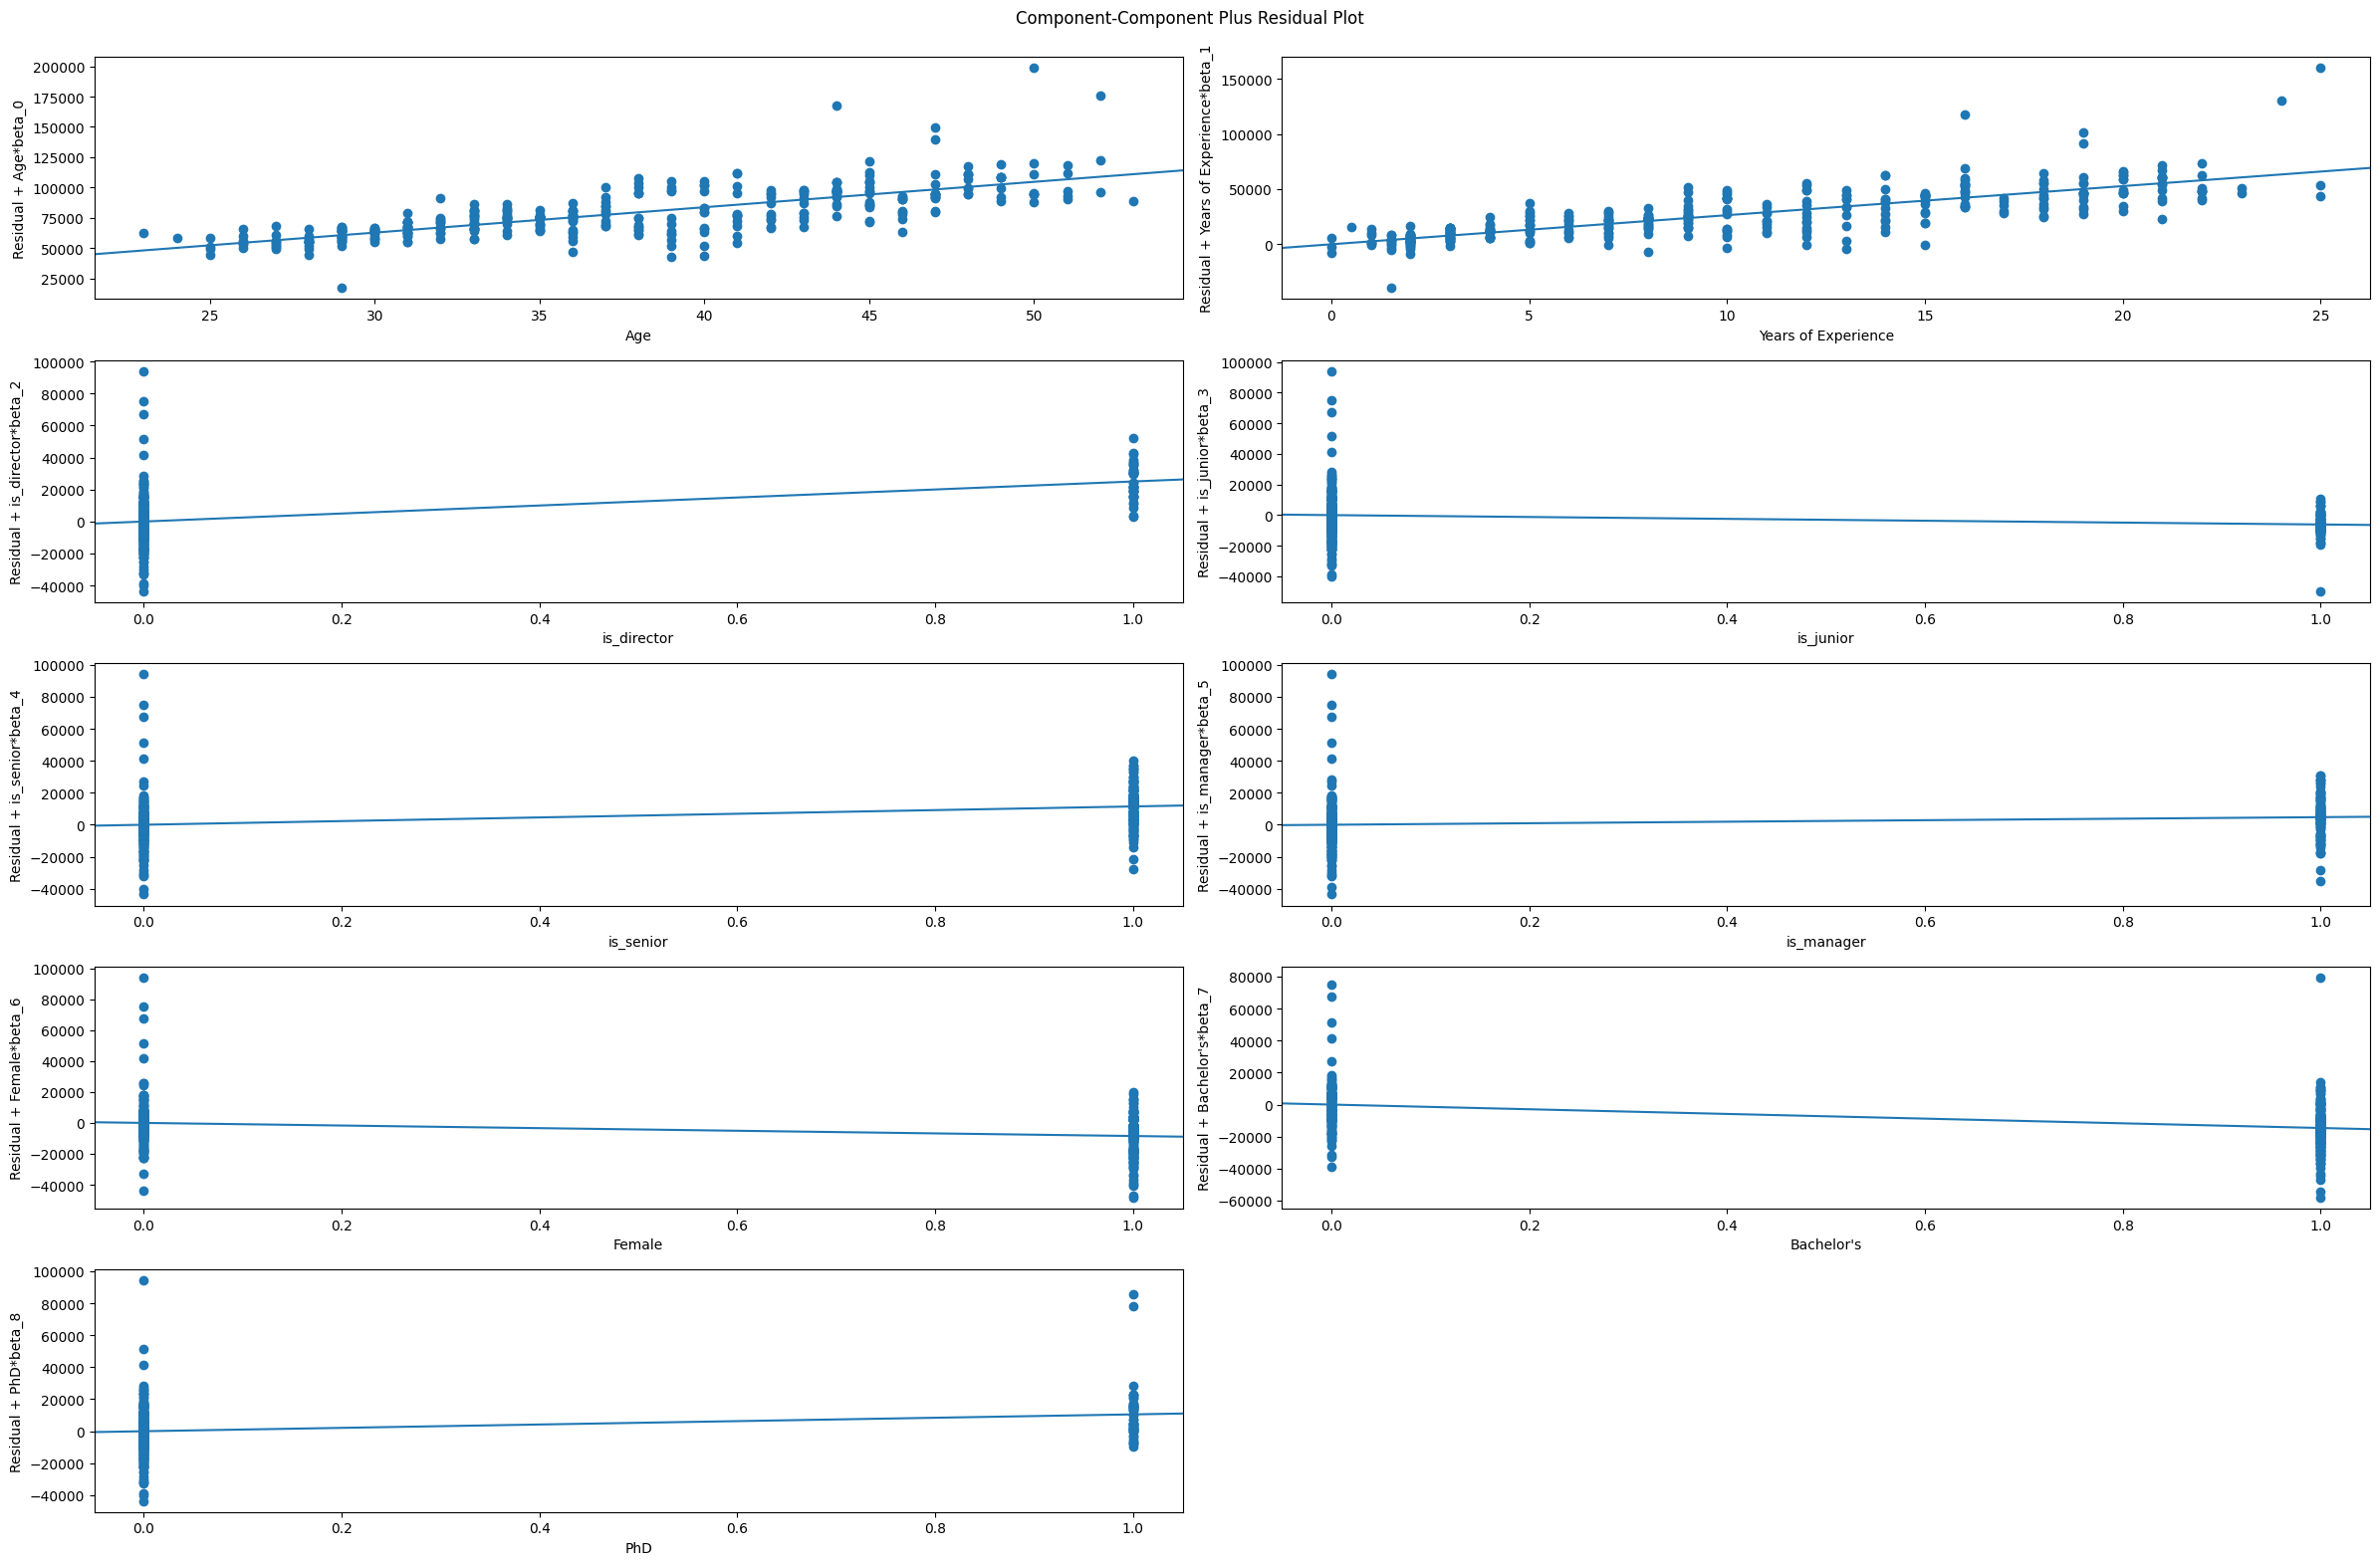

In [32]:
fig = plt.figure(figsize=(24,16))
plot_ccpr_grid(results, fig=fig)
plt.show()

**Your Answer Here**

I consider R-square score as my metric for indicating how well the model fit.

The R-square of this model is 0.985 which means that approximately 98.5 percent of the variance in the dependent variable can be explained by the independent variable(s) in my model. This suggests a very strong relationship between the variables. According to the R-square score, it also indicate that there's only 1.5 percent of error of model prediction. Shortly, this model is well-performed! but due to high score of it, we still needs to consider some of the other factor like overfitting, or even a context for using this model.

I also using plot_ccpr_grid to plot how well the model performs. 

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the salary prediction project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission

Please follow the directions in the classroom to submit this notebook, as well as your completed slides.